In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 


In [6]:
df = pd.read_csv(r'D:\fraud\data\creditcard.csv')
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.isnull().sum().sum()

np.int64(0)

In [9]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
df['Class'].value_counts(normalize=True)


Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

In [11]:
from sklearn.preprocessing import StandardScaler
df['Amount_Scaled'] = StandardScaler().fit_transform(df[['Amount']])


In [12]:
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_Scaled
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475


In [13]:
df.drop( 'Amount', axis = 1, inplace=True)

In [14]:
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_Scaled
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475


In [15]:
# Visualization
frauds = df[df['Class'] == 1]
non_frauds = df[df['Class'] == 0].sample(len(frauds), random_state=42)

df_balanced = pd.concat([frauds, non_frauds])


In [16]:
df_balanced['Class'].value_counts(normalize=True)

Class
1    0.5
0    0.5
Name: proportion, dtype: float64

C:\Users\ckpra\AppData\Local\Temp\ipykernel_25452\3091731295.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title=target, loc='upper right', fontsize=7)
C:\Users\ckpra\AppData\Local\Temp\ipykernel_25452\3091731295.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title=target, loc='upper right', fontsize=7)
C:\Users\ckpra\AppData\Local\Temp\ipykernel_25452\3091731295.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title=target, loc='upper right', fontsize=7)
C:\Users\ckpra\AppData\Local\Temp\ipykernel_25452\3091731295.py:34: UserWarning: No artists with labels found to pu

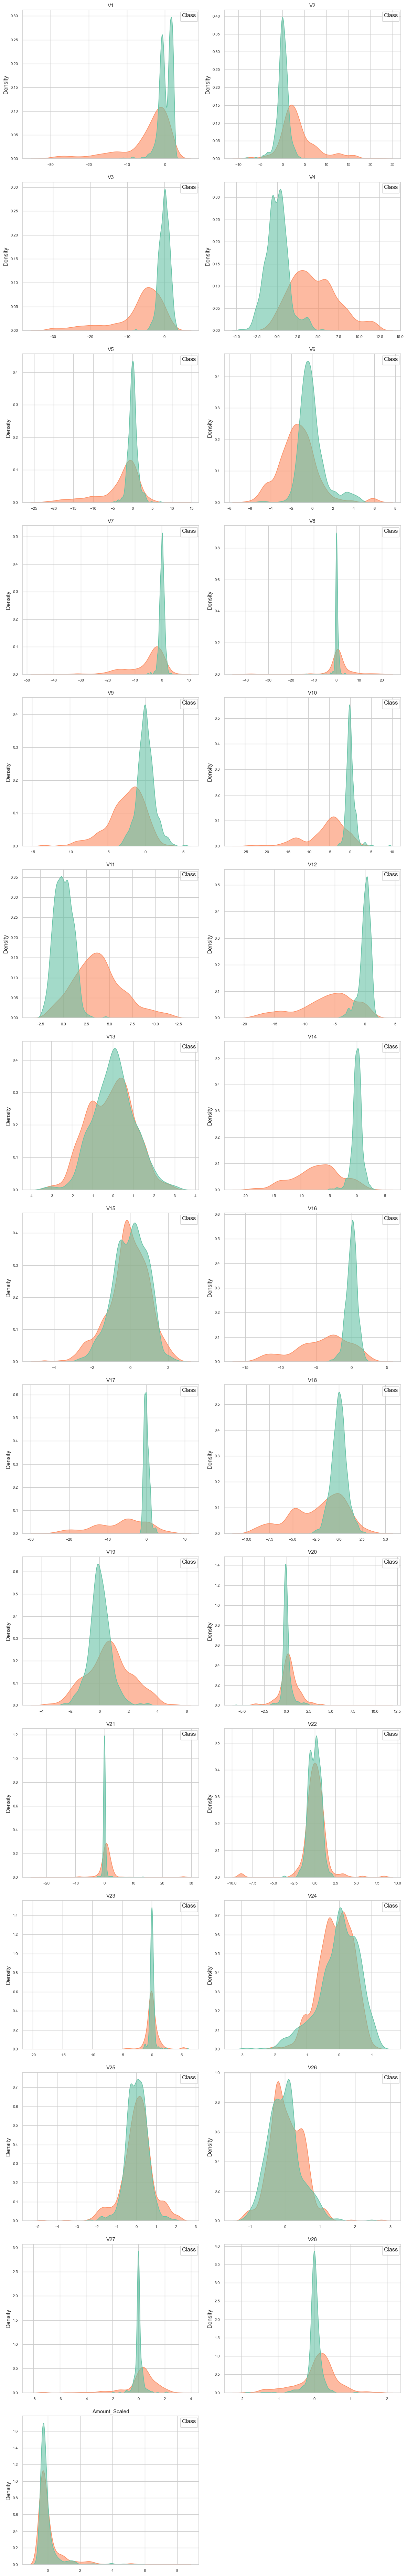

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="Set2", font_scale=1.0)

def plot_kde_subplots(df, features, target='Class', cols=3, figsize=(15, 4)):
    """
    Plots KDE distributions of given features, split by target class.

    Args:
        df: pandas DataFrame
        features: list of feature names
        target: target column name (default: 'Class')
        cols: number of columns in subplot grid
        figsize: size of each row (width, height)
    """
    rows = (len(features) + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(figsize[0], figsize[1]*rows))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        ax = axes[i]
        sns.kdeplot(
            data=df, x=feature, hue=target,
            fill=True, common_norm=False, alpha=0.6, linewidth=1.2,
            bw_adjust=0.8, ax=ax
        )
        ax.set_title(f"{feature}", fontsize=11)
        ax.set_xlabel("")
        ax.set_ylabel("Density")
        ax.tick_params(axis='x', labelsize=8)
        ax.tick_params(axis='y', labelsize=8)
        ax.legend(title=target, loc='upper right', fontsize=7)

    # Remove any empty subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    fig.tight_layout(h_pad=1.5)
    plt.show()


def create_balanced_df(df, target='Class', seed=42):
    """
    Creates a balanced subset of df for visualization only.

    Args:
        df: pandas DataFrame
        target: target column name (default: 'Class')
        seed: random seed for reproducibility
    Returns:
        balanced_df: DataFrame with equal number of 0 and 1 classes
    """
    fraud = df[df[target] == 1]
    non_fraud = df[df[target] == 0].sample(len(fraud), random_state=seed)
    balanced_df = pd.concat([fraud, non_fraud]).sample(frac=1, random_state=seed).reset_index(drop=True)
    return balanced_df

# Example usage:

features = [col for col in df.columns if col not in ['Class', 'Time']]
balanced_df = create_balanced_df(df)

plot_kde_subplots(
    balanced_df,
    features,
    target='Class',
    cols=2,
    figsize=(12, 5)
)


In [18]:
from scipy.stats import pointbiserialr
import pandas as pd

# Assume df has your dataset
target = 'Class'
features = [col for col in df.columns if col != target]

results = []
for feature in features:
    r, p = pointbiserialr(df[feature], df[target])
    results.append((feature, r, p))

corr_df = pd.DataFrame(results, columns=['Feature', 'PointBiserial', 'p-value'])
corr_df['AbsCorr'] = corr_df['PointBiserial'].abs()
corr_df = corr_df.sort_values(by='AbsCorr', ascending=False)

print(corr_df[['Feature', 'PointBiserial', 'p-value']].to_string(index=False))


      Feature  PointBiserial       p-value
          V17      -0.326481  0.000000e+00
          V14      -0.302544  0.000000e+00
          V12      -0.260593  0.000000e+00
          V10      -0.216883  0.000000e+00
          V16      -0.196539  0.000000e+00
           V3      -0.192961  0.000000e+00
           V7      -0.187257  0.000000e+00
          V11       0.154876  0.000000e+00
           V4       0.133447  0.000000e+00
          V18      -0.111485  0.000000e+00
           V1      -0.101347  0.000000e+00
           V9      -0.097733  0.000000e+00
           V5      -0.094974  0.000000e+00
           V2       0.091289  0.000000e+00
           V6      -0.043643 4.213111e-120
          V21       0.040413 3.002269e-103
          V19       0.034783  5.801517e-77
          V20       0.020090  7.964292e-27
           V8       0.019875  2.740673e-26
          V27       0.017580  6.441920e-21
         Time      -0.012323  4.818269e-11
          V28       0.009536  3.595354e-07
          V

C:\Users\ckpra\AppData\Local\Temp\ipykernel_25452\1820251821.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


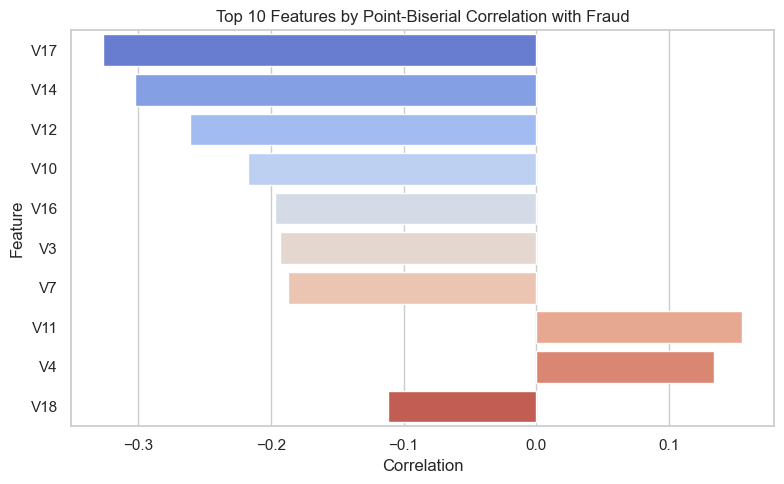

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

top_corr = corr_df.sort_values(by='AbsCorr', ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(
    data=top_corr,
    x='PointBiserial',
    y='Feature',
    palette='coolwarm'
)
plt.title("Top 10 Features by Point-Biserial Correlation with Fraud")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [20]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,             
    stratify=y,                # preserve fraud proportion
    random_state=42
)


In [21]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, average_precision_score, roc_auc_score




pr_auc_scorer = make_scorer(average_precision_score, needs_proba=True)


cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


clf = LogisticRegression(
    class_weight='balanced',   # handle imbalance
    solver='liblinear',        # stable
    max_iter=1000,
    random_state=42
)


cv_scores = cross_val_score(
    clf, X_train, y_train,
    cv=cv,
    scoring=pr_auc_scorer,
    n_jobs=-1
)

print(f"Mean PR-AUC (CV): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


clf.fit(X_train, y_train)
y_test_proba = clf.predict_proba(X_test)[:,1]

pr_auc_test = average_precision_score(y_test, y_test_proba)
roc_auc_test = roc_auc_score(y_test, y_test_proba)

print(f"Final Test PR-AUC:  {pr_auc_test:.4f}")
print(f"Final Test ROC-AUC: {roc_auc_test:.4f}")


Mean PR-AUC (CV): nan ± nan
Final Test PR-AUC:  0.6980
Final Test ROC-AUC: 0.9724


In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

scores = []
for train_idx, val_idx in sss.split(X_train, y_train):
    X_t, X_v = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_t, y_v = y_train.iloc[train_idx], y_train.iloc[val_idx]

    clf.fit(X_t, y_t)
    y_v_proba = clf.predict_proba(X_v)[:,1]
    score = average_precision_score(y_v, y_v_proba)
    scores.append(score)

print(f"Mean PR-AUC: {np.mean(scores):.4f} ± {np.std(scores):.4f}")


KeyboardInterrupt: 

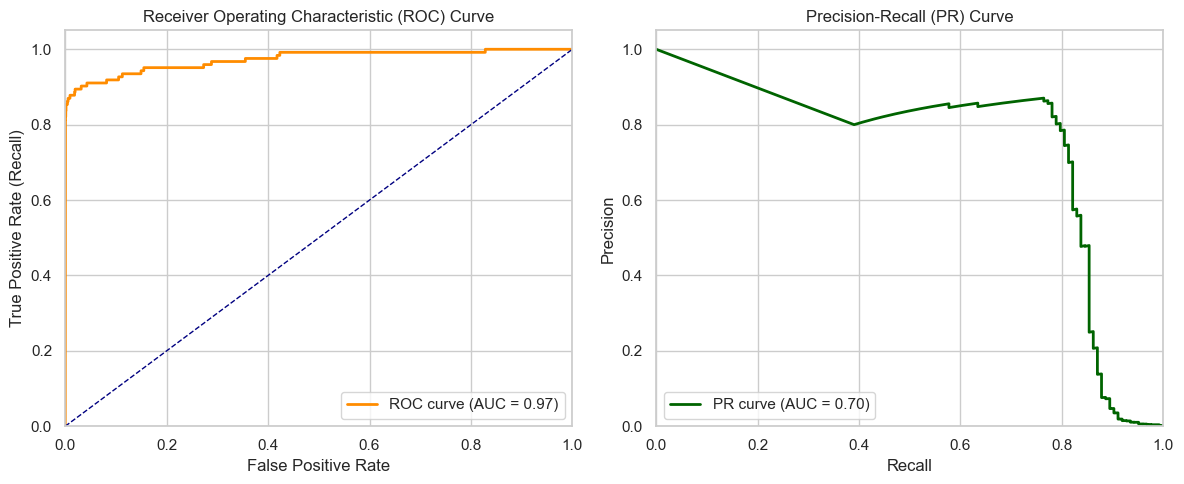

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Predict probabilities on test set
y_test_proba = clf.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, roc_thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# PR Curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_test_proba)
pr_auc = average_precision_score(y_test, y_test_proba)

# Plot
plt.figure(figsize=(12,5))

# ROC Curve subplot
plt.subplot(1,2,1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# PR Curve subplot
plt.subplot(1,2,2)
plt.plot(recall, precision, color='darkgreen', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()


Test ROC-AUC: 0.9728
Test PR-AUC:  0.6982


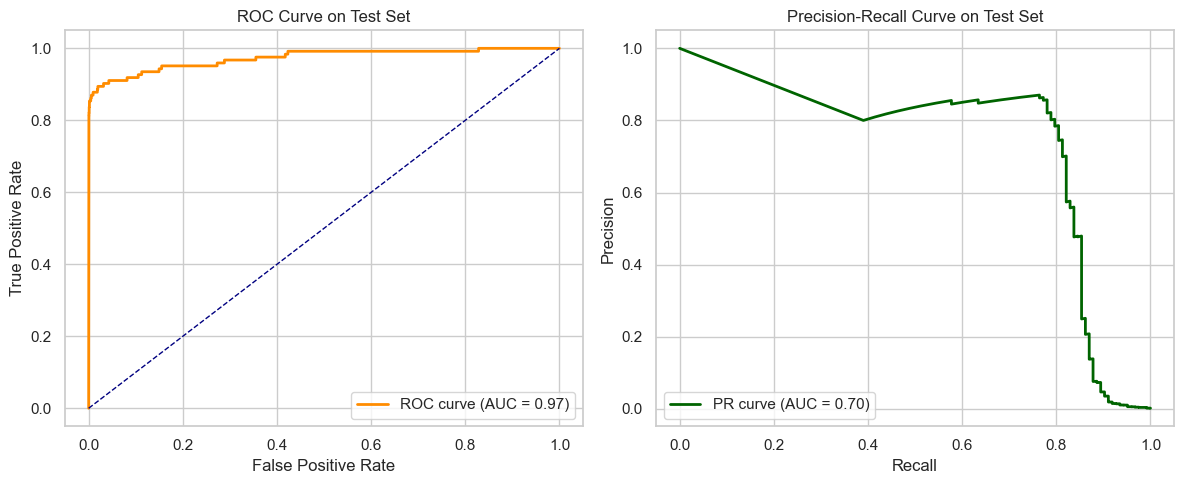

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

#  Predict probabilities on test set
y_test_proba = clf.predict_proba(X_test)[:, 1]

# ROC
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# PR
precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
pr_auc = average_precision_score(y_test, y_test_proba)

print(f"Test ROC-AUC: {roc_auc:.4f}")
print(f"Test PR-AUC:  {pr_auc:.4f}")

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# ROC curve
plt.subplot(1,2,1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Test Set')
plt.legend(loc='lower right')

# PR curve
plt.subplot(1,2,2)
plt.plot(recall, precision, color='darkgreen', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve on Test Set')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()


[LightGBM] [Info] Number of positive: 369, number of negative: 213236
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020675 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 213605, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Test ROC-AUC: 0.9833
Test PR-AUC:  0.8677


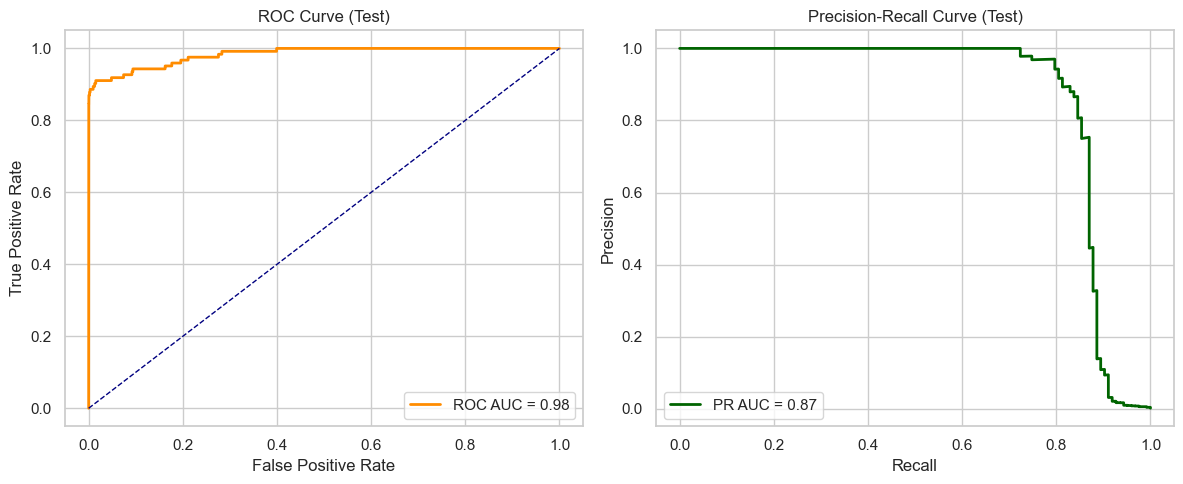


Top features:
 V4               768
Time             761
V14              742
V26              664
V12              650
V10              640
V24              590
V13              560
Amount_Scaled    554
V18              528
dtype: int32


In [ ]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

# Create LGBMClassifier
lgb_clf = lgb.LGBMClassifier(
    objective='binary',
    class_weight='balanced',      # alternative to is_unbalance
    boosting_type='gbdt',
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=31,
    random_state=42,
    n_jobs=-1
)

#  Fit on full training data
lgb_clf.fit(X_train, y_train)

# 🧪 Predict on test
y_test_proba = lgb_clf.predict_proba(X_test)[:, 1]

# Metrics
roc_auc = roc_auc_score(y_test, y_test_proba)
pr_auc = average_precision_score(y_test, y_test_proba)

print(f"Test ROC-AUC: {roc_auc:.4f}")
print(f"Test PR-AUC:  {pr_auc:.4f}")

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_proba)

# PR curve
precision, recall, _ = precision_recall_curve(y_test, y_test_proba)

# Plot ROC & PR
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test)')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(recall, precision, color='darkgreen', lw=2, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Test)')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

#  Feature Importances
import pandas as pd
feat_imp = pd.Series(lgb_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("\nTop features:\n", feat_imp.head(10))


[LightGBM] [Info] Number of positive: 369, number of negative: 213236
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019315 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7905
[LightGBM] [Info] Number of data points in the train set: 213605, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Test ROC-AUC: 0.9812
Test PR-AUC:  0.8633

Top features:
 V4               749
Time             744
V14              722
V26              682
V12              621
V10              583
V13              556
V24              553
Amount_Scaled    525
V22              509
dtype: int32


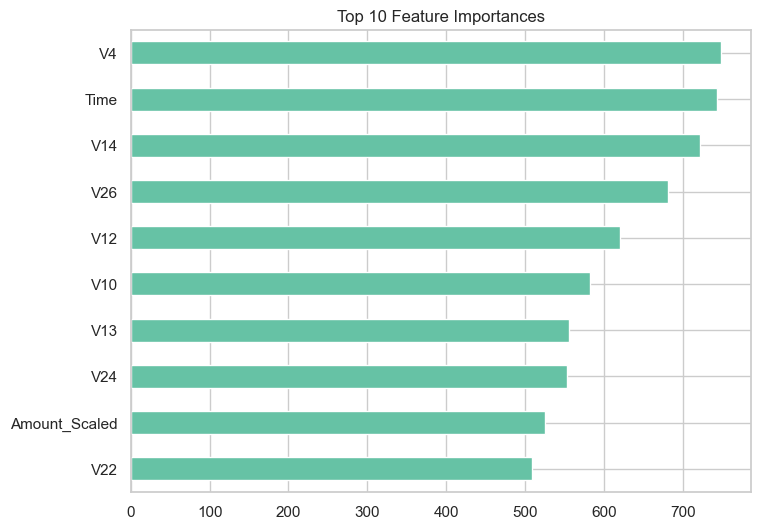

In [ ]:
from sklearn.ensemble import IsolationForest
import pandas as pd

#  Fit Isolation Forest
iso_forest = IsolationForest(
    n_estimators=100,
    contamination=0.01,   # adjust if you have a prior on fraud rate
    random_state=42
)
iso_forest.fit(X_train)

#  Compute anomaly scores
X_train_if = X_train.copy()
X_test_if = X_test.copy()

X_train_if['if_score'] = iso_forest.decision_function(X_train)
X_test_if['if_score'] = iso_forest.decision_function(X_test)

#  Train LightGBM with the new feature
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, average_precision_score

lgb_clf = lgb.LGBMClassifier(
    objective='binary',
    class_weight='balanced',
    boosting_type='gbdt',
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=31,
    random_state=42,
    n_jobs=-1
)

lgb_clf.fit(X_train_if, y_train)

#  Evaluate
y_test_proba = lgb_clf.predict_proba(X_test_if)[:,1]

roc_auc = roc_auc_score(y_test, y_test_proba)
pr_auc = average_precision_score(y_test, y_test_proba)

print(f"Test ROC-AUC: {roc_auc:.4f}")
print(f"Test PR-AUC:  {pr_auc:.4f}")

#  Feature Importances
import matplotlib.pyplot as plt

feat_imp = pd.Series(
    lgb_clf.feature_importances_,
    index=X_train_if.columns
).sort_values(ascending=False)

print("\nTop features:\n", feat_imp.head(10))


plt.figure(figsize=(8,6))
feat_imp.head(10).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances")
plt.show()


Isolation Forest (alone) Test ROC-AUC: 0.9469
Isolation Forest (alone) Test PR-AUC:  0.1631


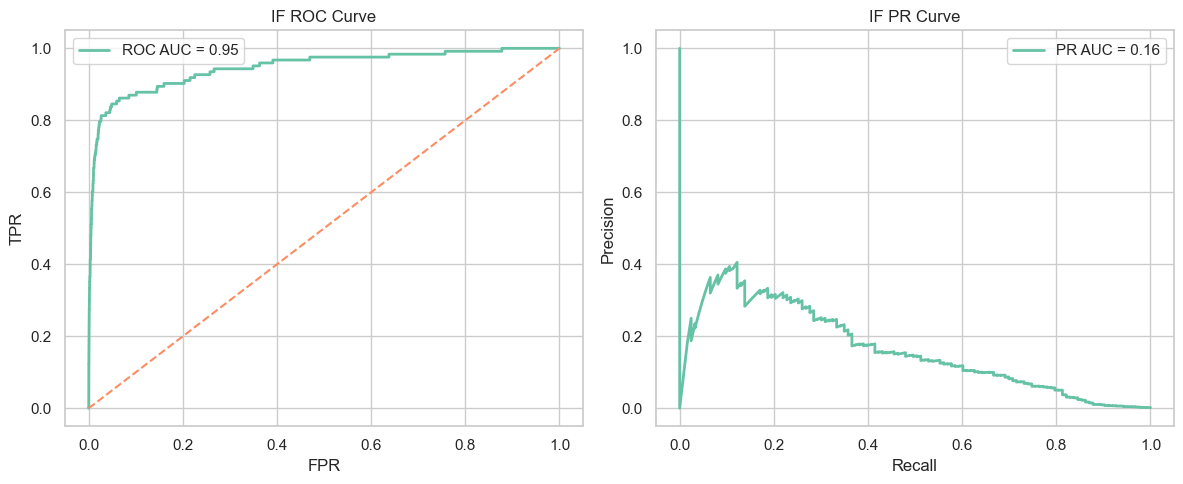

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

#  Fit Isolation Forest
iso_forest = IsolationForest(
    n_estimators=100,
    contamination=0.0017,   # set to known fraud rate ~0.17%
    random_state=42
)
iso_forest.fit(X_train)

#  Predict anomaly scores on test
scores_test = iso_forest.decision_function(X_test)  # higher is more normal
y_pred_if = iso_forest.predict(X_test)              # 1=normal, -1=anomaly
y_pred_if = (y_pred_if == -1).astype(int)           # 1=anomaly, 0=normal

#  Evaluate using known labels
roc_auc = roc_auc_score(y_test, -scores_test)  # lower scores = more anomalous
pr_auc = average_precision_score(y_test, -scores_test)

print(f"Isolation Forest (alone) Test ROC-AUC: {roc_auc:.4f}")
print(f"Isolation Forest (alone) Test PR-AUC:  {pr_auc:.4f}")

#  Plot PR & ROC curves
fpr, tpr, _ = roc_curve(y_test, -scores_test)
precision, recall, _ = precision_recall_curve(y_test, -scores_test)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(fpr, tpr, lw=2, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0,1],[0,1],'--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("IF ROC Curve")
plt.legend()

plt.subplot(1,2,2)
plt.plot(recall, precision, lw=2, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("IF PR Curve")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import average_precision_score, roc_auc_score
import numpy as np
import pandas as pd

#  Assume you already have:
# X_train, y_train, X_test, y_test
# (replace with your dataset load/split code if needed)

# Example placeholder (delete if not needed):
# X_train, y_train = pd.DataFrame(...), pd.Series(...)
# X_test, y_test = pd.DataFrame(...), pd.Series(...)

cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=5, random_state=42)

def objective(trial):
    params = {
        'boosting_type': 'gbdt',
        'is_unbalance': True,
        'verbosity': -1,
        'num_leaves': trial.suggest_int('num_leaves', 16, 128),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.6, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.6, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 5.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 5.0),
        'n_estimators': 100  # fixed here
    }

    pr_aucs = []
    valid_folds = 0

    for i, (train_idx, valid_idx) in enumerate(cv.split(X_train, y_train)):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[valid_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[valid_idx]

        if y_val.sum() == 0:
            # No positives in validation set
            continue

        clf = LGBMClassifier(**params)
        clf.fit(X_tr, y_tr)

        preds = clf.predict_proba(X_val)[:, 1]
        pr_auc = average_precision_score(y_val, preds)
        pr_aucs.append(pr_auc)
        valid_folds += 1

    if valid_folds == 0:
        return 0.0  # fallback if no usable folds

    return np.mean(pr_aucs)

# 🔷 Run Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("\n Best parameters:")
print(study.best_params)

# Best params + fixed settings
best_params = study.best_params
best_params.update({
    'boosting_type': 'gbdt',
    'is_unbalance': True,
    'verbosity': -1,
    'n_estimators': 100
})

# 🔷 Evaluate best params on full Repeated CV
pr_aucs, roc_aucs = [], []
valid_folds = 0

for i, (train_idx, valid_idx) in enumerate(cv.split(X_train, y_train)):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[valid_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[valid_idx]

    if y_val.sum() == 0:
        print(f"Fold {i}: skipped (no frauds in validation set)")
        continue

    clf = LGBMClassifier(**best_params)
    clf.fit(X_tr, y_tr)

    preds = clf.predict_proba(X_val)[:, 1]
    pr_aucs.append(average_precision_score(y_val, preds))
    roc_aucs.append(roc_auc_score(y_val, preds))
    valid_folds += 1

print(f"\n CV PR-AUC: {np.mean(pr_aucs):.4f} ± {np.std(pr_aucs):.4f} over {valid_folds} folds")
print(f" CV ROC-AUC: {np.mean(roc_aucs):.4f} ± {np.std(roc_aucs):.4f} over {valid_folds} folds")

# 🔷 Fit final model on full train & test
final_model = LGBMClassifier(**best_params)
final_model.fit(X_train, y_train)

test_preds = final_model.predict_proba(X_test)[:, 1]
test_pr_auc = average_precision_score(y_test, test_preds)
test_roc_auc = roc_auc_score(y_test, test_preds)

print(f"\n Test PR-AUC: {test_pr_auc:.4f}")
print(f" Test ROC-AUC: {test_roc_auc:.4f}")


[I 2025-07-13 18:40:55,380] A new study created in memory with name: no-name-0bd622a9-e63f-4f49-a969-dbfc463f4f4f


[I 2025-07-13 18:41:17,059] Trial 0 finished with value: 0.33396875299449574 and parameters: {'num_leaves': 36, 'max_depth': 11, 'learning_rate': 0.09309718440793106, 'feature_fraction': 0.7735727591697729, 'bagging_fraction': 0.792218733209797, 'bagging_freq': 7, 'reg_alpha': 1.776135860156412, 'reg_lambda': 0.6032513385565014}. Best is trial 0 with value: 0.33396875299449574.
[I 2025-07-13 18:41:33,955] Trial 1 finished with value: 0.5940310123761087 and parameters: {'num_leaves': 52, 'max_depth': 11, 'learning_rate': 0.09051466922978792, 'feature_fraction': 0.7686887123882499, 'bagging_fraction': 0.7602358732801362, 'bagging_freq': 1, 'reg_alpha': 0.5617740921553149, 'reg_lambda': 4.561960512289878}. Best is trial 1 with value: 0.5940310123761087.
[I 2025-07-13 18:41:49,683] Trial 2 finished with value: 0.6801420632098708 and parameters: {'num_leaves': 117, 'max_depth': 11, 'learning_rate': 0.04456476240930076, 'feature_fraction': 0.77995810720466, 'bagging_fraction': 0.738968646133


✅ Best parameters:
{'num_leaves': 76, 'max_depth': 9, 'learning_rate': 0.02236102792629413, 'feature_fraction': 0.7313083543178484, 'bagging_fraction': 0.8556859532165869, 'bagging_freq': 6, 'reg_alpha': 1.0114101168115992, 'reg_lambda': 1.9788242492580674}

✅ CV PR-AUC: 0.8109 ± 0.0290 over 15 folds
✅ CV ROC-AUC: 0.9195 ± 0.0200 over 15 folds

✅ Test PR-AUC: 0.8169
✅ Test ROC-AUC: 0.9271


In [ ]:
import joblib
joblib.dump(final_model, "final_fraud_model_lgbm.pkl")


['final_fraud_model_lgbm.pkl']

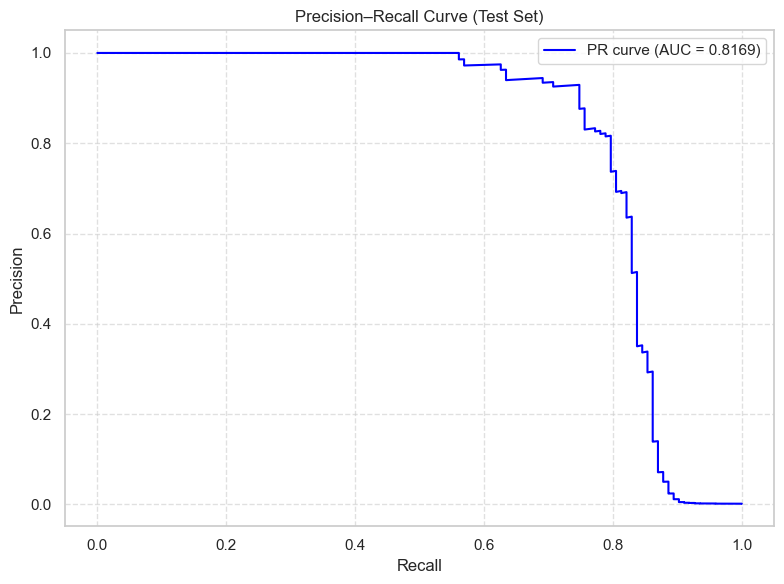

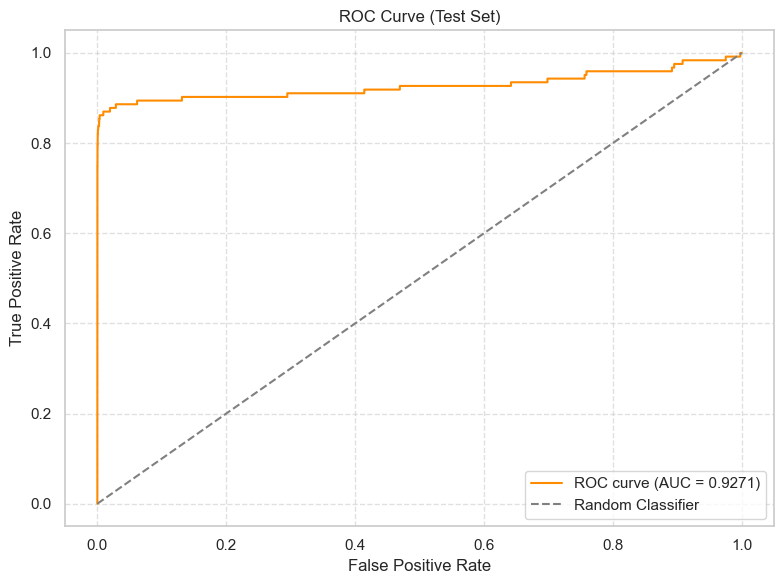

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    precision_recall_curve,
    roc_curve,
    average_precision_score,
    roc_auc_score
)

# compute curves
precision, recall, pr_thresholds = precision_recall_curve(y_test, test_preds)
fpr, tpr, roc_thresholds = roc_curve(y_test, test_preds)

pr_auc = average_precision_score(y_test, test_preds)
roc_auc = roc_auc_score(y_test, test_preds)

# PR Curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'PR curve (AUC = {pr_auc:.4f})', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve (Test Set)')
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})', color='darkorange')
plt.plot([0,1], [0,1], linestyle='--', color='gray', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
import shap

In [23]:
X_train.to_csv("X_train.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_test.to_csv("y_test.csv", index=False)
